### Model Trainig 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [8]:
df=pd.read_csv('data\StudentsPerformance.csv')

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
# Independen and and dependent variables
X = df.drop(columns=['math score'])
y= df['math score']

In [11]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [12]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

### Creating column Transformers in 3 different ways

In [13]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [14]:
num_features

Index(['reading score', 'writing score'], dtype='object')

In [15]:
cat_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [17]:
num_transformer=StandardScaler()
one_hot_transformer=OneHotEncoder()

In [18]:
pre_processor = ColumnTransformer(
    [
        ('StandardScaler', num_transformer, num_features),
        ('OneHotEncoder', one_hot_transformer, cat_features)
    ]
)

In [19]:
X=pre_processor.fit_transform(X)

In [21]:
X.shape

(1000, 19)

### Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(800, 19)

In [25]:
X_test.shape

(200, 19)

### Create an evaluate function to give all metrics after model training

In [26]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    r2 = r2_score(true, predicted)

    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}')

    return mse, mae, r2

### Model Training

In [27]:
models={
    "linear regression":LinearRegression(),
    "ridge regression":Ridge(),
    "lasso regression":Lasso(),
    "decision tree":DecisionTreeRegressor(),
    "random forest":RandomForestRegressor(),
    "ada boost":AdaBoostRegressor(),
    "cat boost":CatBoostRegressor(verbose=0),
    "xg boost":XGBRegressor(eval_metric='rmse')
}

In [33]:
model_list = []
r2_list = []
for i in range(len(models)):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    
    
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_train, mae_train, r2_train = evaluate_model(y_train, y_pred_train)
    mse_test, mae_test, r2_test = evaluate_model(y_test, y_pred_test)
    
    model_list.append(model_name)

    #print Values
    print("--------training set-------------")
    print(f"Model: {model_name}")
    print(f"R^2 Score: {r2_train}")
    print(f"Mean Squared Error: {mse_train}")
    print(f"Mean Absolute Error: {mae_train}")

    print("--------test set-------------")
    print(f"Model: {model_name}")
    print(f"R^2 Score: {r2_test}")
    print(f"Mean Squared Error: {mse_test}")
    print(f"Mean Absolute Error: {mae_test}")
    print("\n")
    r2_list.append(r2_test)

Mean Squared Error: 28.33487038064859
Mean Absolute Error: 4.266711846071956
R^2 Score: 0.8743172040139593
Mean Squared Error: 29.095169866715466
Mean Absolute Error: 4.214763142474849
R^2 Score: 0.8804332983749565
--------training set-------------
Model: linear regression
R^2 Score: 0.8743172040139593
Mean Squared Error: 28.33487038064859
Mean Absolute Error: 4.266711846071956
--------test set-------------
Model: linear regression
R^2 Score: 0.8804332983749565
Mean Squared Error: 29.095169866715466
Mean Absolute Error: 4.214763142474849


Mean Squared Error: 28.337788233082442
Mean Absolute Error: 4.2649878237259795
R^2 Score: 0.8743042615212909
Mean Squared Error: 29.05627219234827
Mean Absolute Error: 4.211100688014259
R^2 Score: 0.880593148502874
--------training set-------------
Model: ridge regression
R^2 Score: 0.8743042615212909
Mean Squared Error: 28.337788233082442
Mean Absolute Error: 4.2649878237259795
--------test set-------------
Model: ridge regression
R^2 Score: 0.88059

## results

In [34]:
df_results = pd.DataFrame({'Model': model_list, 'R^2 Score': r2_list})
df_results.sort_values(by='R^2 Score', ascending=False, inplace=True)

In [35]:
df_results

,Model,R^2 Score
1,ridge regression,0.880593
0,linear regression,0.880433
6,cat boost,0.851632
4,random forest,0.850883
5,ada boost,0.848612
2,lasso regression,0.825320
7,xg boost,0.821221
3,decision tree,0.764567


#### Plot y_pred_test and y_test

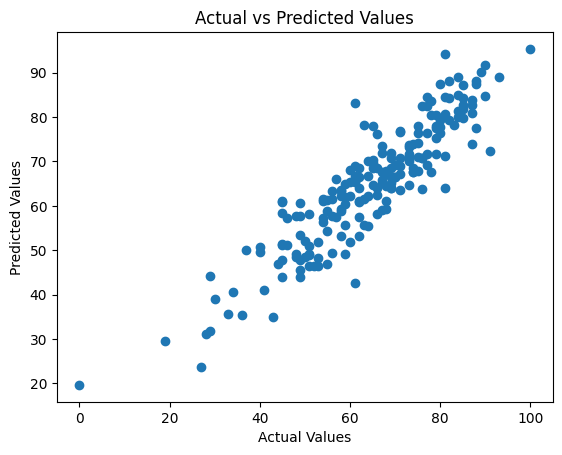

In [36]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<Axes: xlabel='math score'>

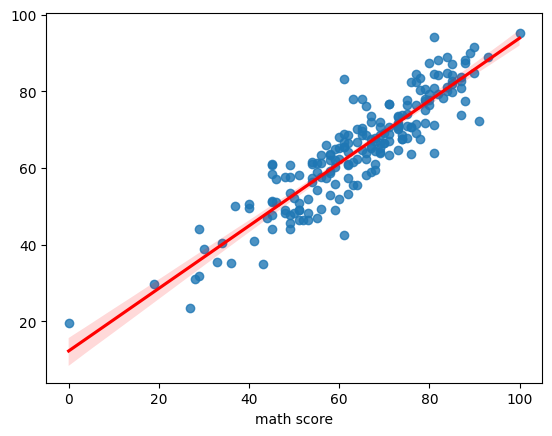

In [37]:
sns.regplot(x=y_test, y=y_pred_test, line_kws={"color": "red"})

#### Difference between actual and predicted value

In [39]:
pred_df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test,'Difference': y_test - y_pred_test})
pred_df.head()

,Actual,Predicted,Difference
521,91,72.256554,18.743446
737,53,51.827824,1.172176
740,80,79.382545,0.617455
660,74,73.846962,0.153038
411,84,84.875084,-0.875084
